In [1]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier

In [2]:
df=sns.load_dataset('titanic')

In [3]:
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [4]:
df.isnull().sum()

survived         0
pclass           0
sex              0
age            177
sibsp            0
parch            0
fare             0
embarked         2
class            0
who              0
adult_male       0
deck           688
embark_town      2
alive            0
alone            0
dtype: int64

In [5]:
df=df[['survived','pclass','sex','age','fare','embarked']]
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,male,22.0,7.2500,S
1,1,1,female,38.0,71.2833,C
2,1,3,female,26.0,7.9250,S
3,1,1,female,35.0,53.1000,S
4,0,3,male,35.0,8.0500,S


In [6]:
df.isnull().sum()

survived      0
pclass        0
sex           0
age         177
fare          0
embarked      2
dtype: int64

In [7]:
df.fillna({'age':df['age'].median(),'embarked':df['embarked'].mode()[0]},inplace=True)

In [8]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df['sex']=le.fit_transform(df.sex)
df['embarked']=le.fit_transform(df['embarked'])

In [9]:
df.head()

,survived,pclass,sex,age,fare,embarked
0,0,3,1,22.0,7.2500,2
1,1,1,0,38.0,71.2833,0
2,1,3,0,26.0,7.9250,2
3,1,1,0,35.0,53.1000,2
4,0,3,1,35.0,8.0500,2


In [10]:
x=df.drop('survived',axis=1)
y=df['survived']
x.head(),y.head()

(   pclass  sex   age     fare  embarked
 0       3    1  22.0   7.2500         2
 1       1    0  38.0  71.2833         0
 2       3    0  26.0   7.9250         2
 3       1    0  35.0  53.1000         2
 4       3    1  35.0   8.0500         2,
 0    0
 1    1
 2    1
 3    1
 4    0
 Name: survived, dtype: int64)

In [16]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
classifier=DecisionTreeClassifier(criterion='gini',max_depth=4,random_state=42)

In [17]:
classifier.fit(X_train,y_train)
y_pred=classifier.predict(X_test)
from sklearn.metrics import accuracy_score,confusion_matrix
print(f"Accuracy Score:{accuracy_score(y_test,y_pred)*100}%")

Accuracy Score:81.16591928251121%


<Axes: >

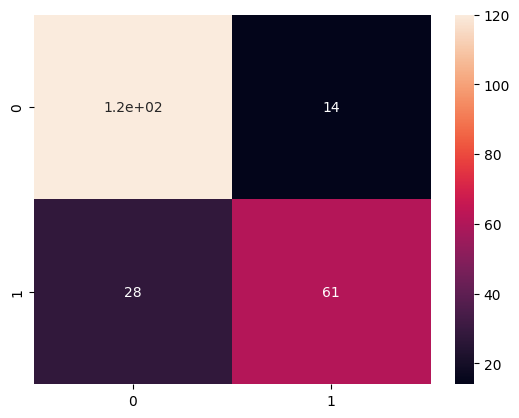

In [18]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True)

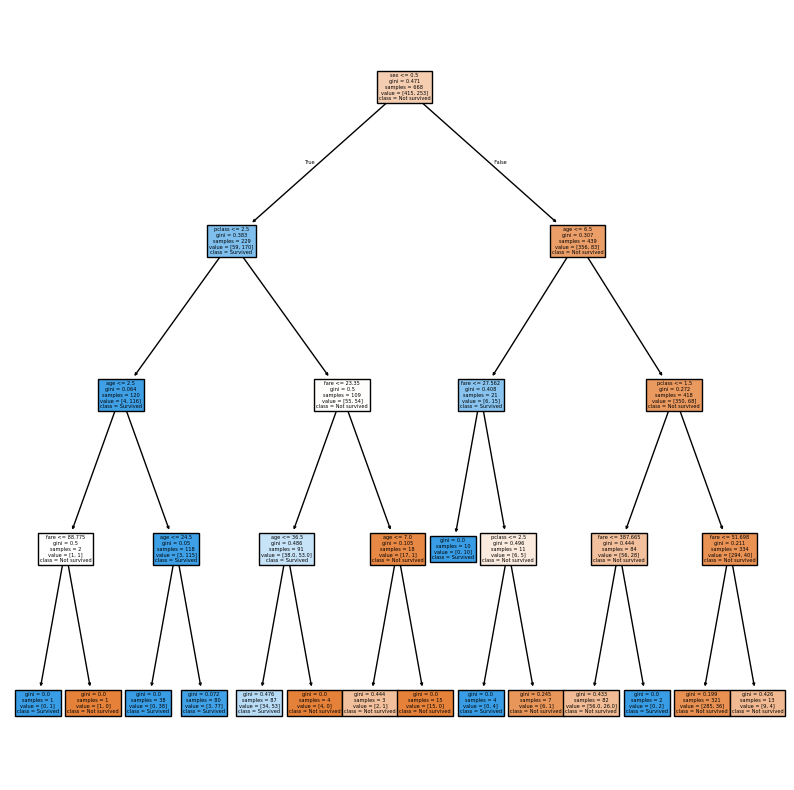

In [22]:
from sklearn.tree import plot_tree

plt.figure(figsize=(10,10))
plot_tree(classifier,feature_names=x.columns,class_names=['Not survived','Survived'],filled=True)
plt.show()

In [25]:
new_p=pd.DataFrame([[3,1,25,7,2]],columns=x.columns)
pred=classifier.predict(new_p)
pred

array([0])

In [26]:
if pred[0]==1:
    print("Passenger is likely to survive")
else:
    print("Passenger is likely NOT to survive")

Passenger is likely NOT to survive
